In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:
train_dataset = datasets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [3]:
batch_size = 100        # Input size of the data during one iteration

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Estructura de un Perceptron Multicapa (MLP)

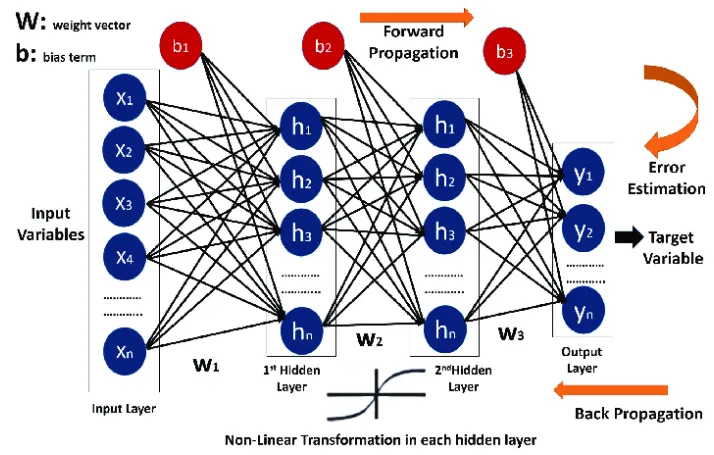

In [11]:
input_size = 784        # Number of input neurons (image pixels)
hidden_size = 400       # Number of hidden neurons
out_size = 10           # Number of classes (0-9)

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)    #First Layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)      #Second Layer Activation
        self.fc3 = nn.Linear(hidden_size, out_size)
        self.relu = nn.ReLU() # only define once time because is the same funtion i use later 2 times
        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [12]:
#Create an object of the class, which represents our network
net = Net(input_size, hidden_size, out_size)
CUDA = torch.cuda.is_available()
if CUDA:
    net = net.cuda()
#The loss function. The Cross Entropy loss comes along with Softmax. Therefore, no need to specify Softmax as well
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) # learning_rate: How fast we are learning

In [13]:
net

Net(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=10, bias=True)
  (relu): ReLU()
)

In [14]:
epochs = 10             # How many times we pass our entire dataset into our network

#Train the network
for epoch in range(epochs):
    correct_train = 0
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        #Flatten the image from size (batch,1,28,28) --> (100,1,28,28) where 1 represents the number of channels (grayscale-->1),
        # to size (100,784) and wrap it in a variable
        images = images.view(-1, 28*28)
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum()
        loss = criterion(outputs, labels)                 # Difference between the actual and predicted (loss function)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()                                   # Backpropagation
        optimizer.step()                                  # Update the weights

    print('Epoch [{}/{}], Training Loss: {:.3f}, Training Accuracy: {:.3f}%'.format
          (epoch+1, epochs, running_loss/len(train_loader), (100*correct_train.double()/len(train_dataset))))
print("DONE TRAINING!")

Epoch [1/10], Training Loss: 0.237, Training Accuracy: 93.175%
Epoch [2/10], Training Loss: 0.086, Training Accuracy: 97.377%
Epoch [3/10], Training Loss: 0.054, Training Accuracy: 98.253%
Epoch [4/10], Training Loss: 0.040, Training Accuracy: 98.757%
Epoch [5/10], Training Loss: 0.030, Training Accuracy: 99.020%
Epoch [6/10], Training Loss: 0.023, Training Accuracy: 99.213%
Epoch [7/10], Training Loss: 0.019, Training Accuracy: 99.350%
Epoch [8/10], Training Loss: 0.016, Training Accuracy: 99.495%
Epoch [9/10], Training Loss: 0.013, Training Accuracy: 99.522%
Epoch [10/10], Training Loss: 0.014, Training Accuracy: 99.553%
DONE TRAINING!


In [15]:
with torch.no_grad():
    correct = 0
    for images, labels in test_loader:
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
        images = images.view(-1, 28*28)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / len(test_dataset)))

Accuracy of the network on the 10000 test images: 98.04 %
